In [1]:
# hidden
import backend
import json
import generate_page as page

schema_path = f'generated/schema.json'
schema_page_path= f'test/convex/schema.ts'
actions_path = 'generated/actions.json'
crud_path = 'generated/crud.ts'
backend_json = 'generated/backend.json'
backend_path = 'test/convex/backend.ts'
page_path = 'generated/page_schema.json'
test_path = 'test/app'
faker_path = 'test/convex/faker.ts'

def plan_database(specification):
    backend.write_to_file(backend.create_schema_structure(specification), schema_path)

def plan_backend():
    schema = backend.read(schema_path)
    backend.write_to_file(backend.create_actions(f"Create it for the following structure: \n<applicationStructure>\n{schema}\n</applicationStructure>"), actions_path)

def create_backend():
    schema = json.loads(backend.read(schema_path))
    actions = backend.read(actions_path)
    schema_page = backend.create_schema(schema, schema_page_path)
    crud_page = backend.create_crud(schema, crud_path)
    actions_code = backend.create_actions_code(actions, schema_page, crud_page, backend_json)
    actions_page = backend.create_actions_page(json.loads(actions), json.loads(actions_code),crud_page, backend_path)

def plan_styles():
    styles = input("Input styling specifications")
    page.extract_ui_styles(styles)
    return

def create_fake_data():
    schema = json.loads(backend.read(schema_path))
    faker_data = backend.create_faker_data_code(schema, faker_path)

def plan_pages(specification):
    schema = backend.read(schema_path)
    actions = backend.read(actions_path)
    backend.write_to_file(backend.create_page_structure("Task: " + specification + "\n\nHere is the database schema for the avaiable database objects you are to use: \n<Schemas>\n" + str(schema) + "\n</Schemas>\n\n Here are the backend queries and mutations that you can call: \n<backend>" + str(actions) + "\n</backend>\n\nNow, generate the page layout strictly in the json format described above." ), page_path)

def plan_all_pages():
    page.write(page_path, page.generate_component_list(schema_path, actions_path))

def generate_pages():
    pages = json.loads(backend.read(page_path))["pages"]
    page.generate_pages(test_path, pages, schema_path, actions_path)
    # page.generate_page(test_path, pages, pages[4], schema_path, actions_path, 0)

def edit( page,  component,  prompt):
    pages = json.loads(backend.read(page_path))["pages"]
    project = page.Project(test_path, pages, schema_path, actions_path)
    project.edit_component(3, 2, "If there are no outgoing requests, indicate that there are no outgoing requests") 

def edit( prompt):
    pages = json.loads(backend.read(page_path))["pages"]
    project = page.Project(test_path, pages, schema_path, actions_path)
    project.edit_component(3, 3, prompt) 

def add_knowledge():
    pages = json.loads(backend.read(page_path))["pages"]
    project = page.Project(test_path, pages, schema_path, actions_path)
    project.add_to_knowledge_base(3, 3)


In [6]:

pages = json.loads(backend.read(page_path))["pages"]
page.generate_page(test_path, pages, pages[4], schema_path, actions_path, 1)


Writing the ProfileForm component... (enter)
Here are the changes to make to the ProfileForm component:

<replace start=0 end=9>
'use client'
import { useMutation, useQuery } from 'convex/react'
import { Doc, Id } from "@/convex/_generated/dataModel";
import { api } from "@/convex/_generated/api";
import { Field, Label } from '@/components/fieldset'
import { Input } from '@/components/input'
import { Textarea } from '@/components/textarea'
import { Checkbox, CheckboxField } from '@/components/checkbox'
import { Button } from '@/components/button'

interface Props {
  userId: Id<"users">;
}

export default ({ userId }: Props) => {
  const user = useQuery(api.backend.getUserProfile, userId ? { userId } : 'skip') as Doc<"users">;
  const updateProfile = useMutation(api.backend.updateUserProfile);

  const handleSubmit = async (event: React.FormEvent<HTMLFormElement>) => {
    event.preventDefault();
    const formData = new FormData(event.currentTarget);
    const name = formData.get('nam

# 

## vly.ai presents:

# Kevin, your AI Enterprise Web Developer

Creates custom business software for your specific use case on your data.

Quality of a developer agency at 10x lower costs.


## FEATURING...

### <u>Enterprise auth and security </u>

Full user management out of the box, secured by Clerk

### <u>Realtime Instant Database </u>

Caching, type safety, & third party integrations, on Convex servers.

### <u> Lightning-fast React + Next.js Frontend </u>

Builds clean custom styles, 70% faster than React with Million.js, 

### <u> Real-world applications and integrations </u>

Connects with email, stripe, text, or other integrations used for real-world use.

<br/>

#### Visual of how it works

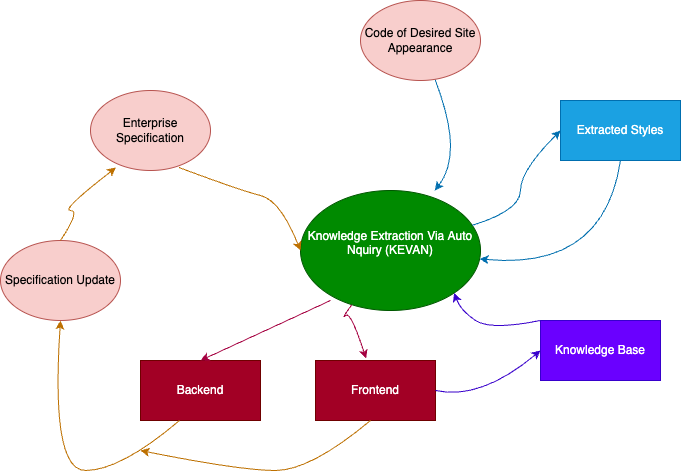

#### Interactive Process Below

Add the enterprise specifications below for clients

In [2]:

specification = """
​​Generate YC’s Co-founder Matching website. It allows entrepreneurs to create a profile, and find the contact information of other entrepreneurs.
It should feature the following pages:
1. A home landing page advertising the Co-founder matching site, which allows the user to start creating an account using the built-in clerk authentication buttons, and shows marketing items advertising how many prestigious Stanford/MIT cofounders are on here. 
2. Next, after the user creates an account by entering their email, they are taken to a page where they create their own profile. They fill out their profile information, which includes the following: their name, a one liner on their background, a link to a linkedin profile (which is hidden from others until matched), and a checkbox on if they are a technical cofounder or not.
3. After their profile is created, they then can view other profiles and interact with them on the match page. Here, they scroll through a list of other user profiles who do not have a match yet. If they are interested, they can press a match button that sends them a match request as well as a short message.
4. Users can also view their match requests, and either approve or reject them. If a request is rejected, it is removed from the matches. If they approve, the request gets moved to a match section, where they can add the other person on linkedin using their linkedin link.
5. Users can also edit their profile as well. If they found a cofounder, they can mark their profile as matched, and they will be removed from the search.
"""

Add a style specification

In [ ]:
plan_styles()

Plan the database tables based on this specification

In [ ]:
plan_database(specification)

Plan the backend server functions

In [ ]:
plan_backend()

AI codes the backend

In [ ]:
create_backend()

The pages are then planned based on specifications and the backend

In [ ]:
plan_all_pages()

The iterative process begins

In [ ]:
generate_pages()

Creates fake data to test the code

In [ ]:
create_fake_data()

### Helpers

For post-generation editing of exisitng code

In [ ]:
edit("In incoming match requests, allow for the user to send a message with their acceptance. do not send a message with rejection")

For adding generated code to the knowledge base

In [10]:
add_knowledge()